In [1]:
import numpy as np
import theano
import theano.tensor as T
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display

import lasagne
from lasagne.layers import *
from lasagne.nonlinearities import linear, elu, rectify, sigmoid, tanh, softplus

from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
G_in = T.matrix('generator input')
D1_in = T.matrix('discriminator input for real X')

In [3]:
G_l1 = InputLayer((None, 2), G_in)
G_l2 = DenseLayer(G_l1, num_units = 10, nonlinearity=rectify)
G_l3 = DenseLayer(G_l2, num_units = 10, nonlinearity=rectify)
G = DenseLayer(G_l3, num_units = 2, nonlinearity=linear)
G_out = lasagne.layers.get_output(G)

In [4]:
D1_l1 = InputLayer((None, 2), D1_in)
D1_l2 = DenseLayer(D1_l1, num_units = 10, nonlinearity=tanh)
D1_l3 = DenseLayer(D1_l2, num_units = 10, nonlinearity=tanh)
D1 = DenseLayer(D1_l3, num_units = 10, nonlinearity=sigmoid)
D1_out = lasagne.layers.get_output(D1)

In [5]:
D2_l1 = InputLayer((None, 2), G_out)
D2_l2 = DenseLayer(D2_l1, num_units = 10, W = D1_l2.W, b=D1_l2.b, nonlinearity=tanh)
D2_l3 = DenseLayer(D2_l2, num_units = 10, W = D1_l3.W, b=D1_l3.b, nonlinearity=tanh)
D2 = DenseLayer(D2_l3, num_units = 10, W = D1.W, b=D1.b, nonlinearity=sigmoid)
D2_out = lasagne.layers.get_output(D2)

In [6]:
L_G = -T.log(D2_out).mean()
L_D = (-T.log(D1_out) - T.log(1-D2_out)).mean()

In [7]:
G_params = lasagne.layers.get_all_params(G)
G_updates = lasagne.updates.sgd(L_G, G_params, 0.0001)
G_train = theano.function([G_in], L_G, updates = G_updates)

In [8]:
D_params = lasagne.layers.get_all_params(D1)
D_updates = lasagne.updates.sgd(L_D, D_params, 0.0001)
D_train = theano.function([D1_in, G_in], L_D, updates = D_updates)

In [9]:
G_func = theano.function([G_in], G_out)

In [10]:
D_func = theano.function([G_in], D2_out)

In [11]:
N = 60000
M = 2000
k = 30

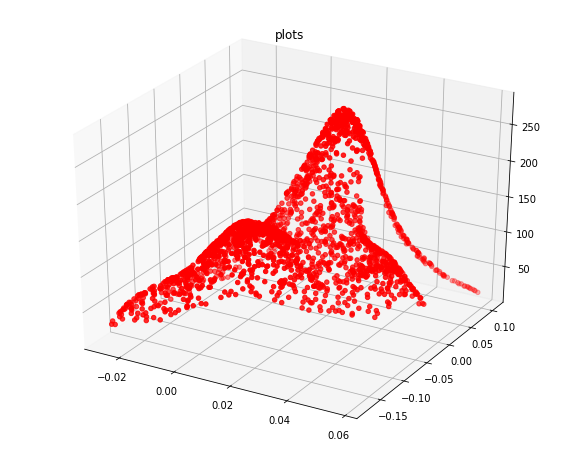

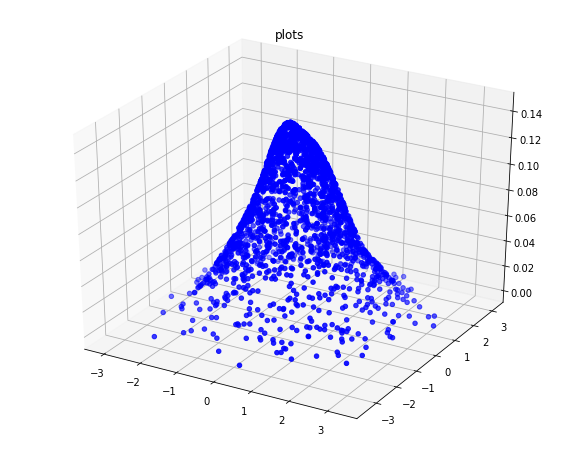

In [12]:
for i in range(N/M):
#     Z = np.random.random((M,2))
#     X = np.random.normal(size = (M,2))
    for j in range(k):
        Z = np.random.random((M,2))
        X = np.random.normal(size = (M,2))
        D_train(Z, X)
        
    Z = np.random.random((M,2))
    G_train(Z)
    
    T = G_func(Z)
    
    G_kde = stats.gaussian_kde(np.vstack([T[:,0],T[:,1]]))(np.vstack([T[:,0], T[:,1]]))
    
    
    X_kde = stats.gaussian_kde(np.vstack([X[:,0], X[:,1]]))(np.vstack([X[:,0], X[:,1]]))
    
    
    display.clear_output(wait=True)
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(T[:,0], T[:,1], G_kde, color = 'red' )
#    ax.scatter(X[:,0], X[:,1], X_kde, color = 'blue')
    plt.title('plots')
    plt.show()
    
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111, projection='3d')
#    ax.scatter(T[:,0], T[:,1], G_kde, color = 'red' )
    ax.scatter(X[:,0], X[:,1], X_kde, color = 'blue')
    plt.title('plots')
    plt.show()
